In [1]:
import socket
import numpy as np
import pandas as pd
import platform
import logging
import cpuinfo
import matplotlib.pyplot as plt
import multiprocessing
import os

import common



In [22]:
def get_CPU_data(cpu_name):
    if(cpu_name == "AMD Ryzen 7 3700X 8-Core Processor"):
        return {
            "cpu_price": 350.0,
            "cpu_power": 65.0,
            "n_threads": 8
        }
    
    if(cpu_name == "Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz"): 
        return {
            "cpu_price": 3290.0,
            "cpu_power": 150.0,
            "n_threads": 40
        }

    else: 
        logging.warning(f"Unknown CPU {cpu_name}")
        return {}


def get_GPU_data(gpu_name):
    if(gpu_name == "NVIDIA GeForce GTX 970"):
        return {
            "gpu_price": 260.0,
            "gpu_power": 500.0,
            "gpu_grid_size": 256,
            "gpu_block_size": 256
        }
    if(gpu_name == "Tesla T4"):
        return {
            "gpu_price": 2500.0,
            "gpu_power": 70.0,
            "gpu_grid_size": 256,
            "gpu_block_size": 256
        }

def is_cluster():
    if(multiprocessing.cpu_count() > 20): return True
    else: return False


def get_system_information():
    cpu_name = cpuinfo.get_cpu_info()["brand_raw"]
    gpu_name = os.popen("nvidia-smi --query-gpu=name --format=csv").read().split("\n")[1]

    data = {
        "host_name" : socket.gethostname(),
        "cpu_name": cpu_name,
        "gpu_name": gpu_name
    }

    data.update(get_CPU_data(cpu_name))
    data.update(get_GPU_data(gpu_name))
    return data



sys_info = get_system_information()

if(is_cluster()):
    # Cluster
    args = {
        "p_rays_start": 12,
        "p_rays_end": 20,
        "n_bench": 64  
    }
else:
    # Home PC
    args = {
       "p_rays_start": 12,
       "p_rays_end": 18,
       "n_bench": 8
    }

args.update(sys_info)


df = common.run_benchmark(
    args=f"--ray_offset 0.2 \
    --omp_n_threads {args['n_threads']} \
    --p_rays_start {args['p_rays_start']} \
    --p_rays_end {args['p_rays_end']} \
    --n_bench {args['n_bench']}",
    print_output=True)

/home/hiti/Workspace/SelectedTopicsCompElectronics/build/src/raytracing --ray_offset 0.2     --omp_n_threads 8     --p_rays_start 12     --p_rays_end 26     --n_bench 64
Running benchmark with --ray_offset 0.2     --omp_n_threads 8     --p_rays_start 12     --p_rays_end 26     --n_bench 64
0.263: Running OpenVDB benchmark for 4096 Rays
0.266: OpenVDB Finished in 0.00215747s (1898.52 kRays/s)
0.268: NanoVDB on CPU Finished in 0.00103086s (3973.38 kRays/s)
0.271: NanoVDB on GPU Finished in 0.000954116s (4.29298 MRays/s)
0.271: Done

0.271: Running OpenVDB benchmark for 4761 Rays
0.274: OpenVDB Finished in 0.00196246s (2426.03 kRays/s)
0.275: NanoVDB on CPU Finished in 0.000991236s (4803.09 kRays/s)
0.279: NanoVDB on GPU Finished in 0.000873592s (5.44991 MRays/s)
0.279: Done

0.279: Running OpenVDB benchmark for 5476 Rays
0.281: OpenVDB Finished in 0.00169564s (3229.46 kRays/s)
0.282: NanoVDB on CPU Finished in 0.00104415s (5244.47 kRays/s)
0.286: NanoVDB on GPU Finished in 0.000822656s (

In [12]:
df = common.load_df("../data/results.csv")
df.tail(10)
args["n_threads"]

TypeError: 'NoneType' object is not subscriptable

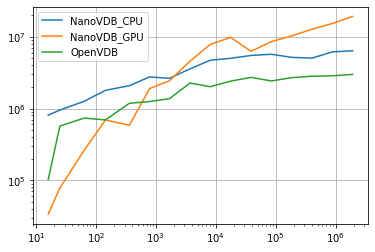

In [40]:
kernels = df.reset_index()["kernel"].unique()

for kernel in kernels:
    plt.plot(df["Rps"].loc[:,kernel], label=kernel)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()

In [37]:
kernels = df.reset_index()["kernel"].unique()

array(['NanoVDB_CPU', 'NanoVDB_GPU', 'OpenVDB'], dtype=object)